# Details on the system module

**For a description on how to use the most important functionality, please checkout the tutorials and the API documentation.**

The following example code shows how to use most of the functionality of the `tempo.dynamics` module. This code is *suplementary* to the documentation and also includes functionality that is only relevant to the inner workings of the TimeEvolvingMPO package. Sections that show example code that is not part of the API is marked with three asterix `***`.

**Contents:**

* A: Dynamics class
    * A1: expectations()
    * A2: export() and import_dynamics()


In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt

import time_evolving_mpo as tempo

## A: Dynamics class

In [2]:
dyn_A = tempo.Dynamics(name="coherent spin dynamics A")

In [3]:
print(dyn_A)

----------------------------------------------
Dynamics object: coherent spin dynamics A
 __no_description__
  length        = 0 timesteps 



In [4]:
dyn_A.add(0.1, 0.95* tempo.operators.spin_dm("up") + 0.05* tempo.operators.spin_dm("x+") )

In [5]:
dyn_A.add(0.2, 0.8* tempo.operators.spin_dm("up") + 0.2* tempo.operators.spin_dm("x+") )

In [6]:
dyn_A.add(0.3, 0.6* tempo.operators.spin_dm("up") + 0.4* tempo.operators.spin_dm("x+") )

In [7]:
dyn_A.add(0.4, 0.2* tempo.operators.spin_dm("up") + 0.8* tempo.operators.spin_dm("x+") )

In [8]:
print(dyn_A)

----------------------------------------------
Dynamics object: coherent spin dynamics A
 __no_description__
  length        = 4 timesteps 
  min time      = 0.1 
  max time      = 0.4 



In [9]:
len(dyn_A)

4

In [10]:
dyn_A.states

array([[[0.975+0.j, 0.025+0.j],
        [0.025+0.j, 0.025+0.j]],

       [[0.9  +0.j, 0.1  +0.j],
        [0.1  +0.j, 0.1  +0.j]],

       [[0.8  +0.j, 0.2  +0.j],
        [0.2  +0.j, 0.2  +0.j]],

       [[0.6  +0.j, 0.4  +0.j],
        [0.4  +0.j, 0.4  +0.j]]])

In [11]:
dyn_A.times

array([0.1, 0.2, 0.3, 0.4])

In [12]:
dyn_A.add(0.0, 1.0* tempo.operators.spin_dm("up") + 0.0* tempo.operators.spin_dm("z+") )

In [13]:
dyn_A.times

array([0. , 0.1, 0.2, 0.3, 0.4])

In [14]:
dyn_A.add(0.15, 0.9* tempo.operators.spin_dm("up") + 0.1* tempo.operators.spin_dm("z+") )

In [15]:
dyn_A.times

array([0.  , 0.1 , 0.15, 0.2 , 0.3 , 0.4 ])

### A1: expectations()

In [16]:
t, z = dyn_A.expectations(tempo.operators.sigma("z"), real=True)

In [17]:
print(t, z)

[0.   0.1  0.15 0.2  0.3  0.4 ] [1.   0.95 1.   0.8  0.6  0.2 ]


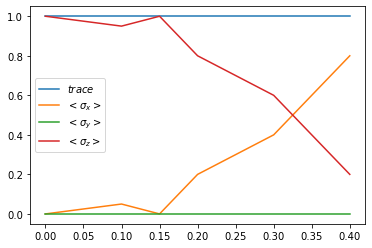

In [18]:
plt.plot(*dyn_A.expectations(real=True), label=r"$trace$")
plt.plot(*dyn_A.expectations(tempo.operators.sigma("x"), real=True), label=r"$<\sigma_x>$")
plt.plot(*dyn_A.expectations(tempo.operators.sigma("y"), real=True), label=r"$<\sigma_y>$")
plt.plot(*dyn_A.expectations(tempo.operators.sigma("z"), real=True), label=r"$<\sigma_z>$")
plt.legend()

### A2: export() and import_dynamics()

In [19]:
dyn_A.export("details_dynamics.tempoDynamics", overwrite=True)

In [20]:
dyn_A2 = tempo.import_dynamics("details_dynamics.tempoDynamics")

In [21]:
print(dyn_A2)

----------------------------------------------
Dynamics object: coherent spin dynamics A
 __no_description__
  length        = 6 timesteps 
  min time      = 0.0 
  max time      = 0.4 



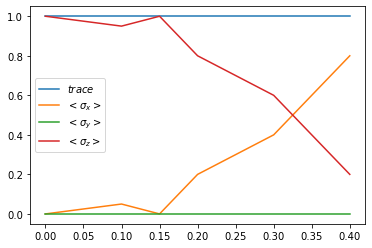

In [22]:
plt.plot(*dyn_A2.expectations(real=True), label=r"$trace$")
plt.plot(*dyn_A2.expectations(tempo.operators.sigma("x"), real=True), label=r"$<\sigma_x>$")
plt.plot(*dyn_A2.expectations(tempo.operators.sigma("y"), real=True), label=r"$<\sigma_y>$")
plt.plot(*dyn_A2.expectations(tempo.operators.sigma("z"), real=True), label=r"$<\sigma_z>$")
plt.legend()